# --- EXERCISE 5.10 (Part 1) - CODING ETIQUETTE & EXCEL REPORTING ---

## Task 1 - Importing Libraries and Merged Customer-Order-Product dataset

In [138]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [139]:
# Setting up 'path' variable to import CUSTOMER-ORDER-PRODUCT dataset to Jupyter

path=r'C:\Users\LENOVO\Desktop\CF - Data Analytics\Achievement 5\Achievement 5 - PROJECT'

In [140]:
# Importing CUSTOMER-ORDER-PRODUCT dataset and assigning it to a dataframe 'df_CUST_ORD_PROD'

df_CUST_ORD_PROD=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_new.pkl'))

In [141]:
# Checking the datatypes of all columns in CUSTOMER-ORDER-PRODUCT dataset

df_CUST_ORD_PROD.dtypes

user_id                      int32
First Name                  object
Surname                   category
Gender                    category
State                     category
Age                           int8
number_of_dependants          int8
family_status             category
income                       int32
order_number                 int16
orders_day_of_week            int8
ordered_hour                  int8
days_since_prior_order     float16
product_id                    int8
add_to_cart_order             int8
reordered                     int8
product_name              category
aisle_id                      int8
department_id                 int8
prices                     float16
price_range_loc           category
Busiest Day               category
Busiest DAYS              category
Busiest_Period_of_Day     category
Max_Order                    int16
loyalty_flag              category
Average_Spend              float16
Spend_Flag                category
Visit_Frequency     

## Task 2 - Personally Identifiable Information

#### Columns like 'First Name' and 'Surname' could possibly be an implication as it could be used to trace back customers. This could potentially be a 'Personally Identifiable Information'.

## Task 3 - Region Segmentation & Crossing Variables

In [128]:
# Creating a new column 'Region' to add the states which belong to Region 1

df_CUST_ORD_PROD.loc[df_CUST_ORD_PROD['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Region 1'

In [129]:
# Creating a new column 'Region' to add the states which belong to Region 2

df_CUST_ORD_PROD.loc[df_CUST_ORD_PROD['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Missouri', 'Iowa']), 'Region'] = 'Region 2'

In [9]:
# Creating a new column 'Region' to add the states which belong to Region 3

df_CUST_ORD_PROD.loc[df_CUST_ORD_PROD['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'Region 3'

In [10]:
# Creating a new column 'Region' to add the states which belong to Region 4

df_CUST_ORD_PROD.loc[df_CUST_ORD_PROD['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'Region 4'

In [142]:
df_CUST_ORD_PROD.head(10)

,user_id,First Name,Surname,Gender,State,Age,number_of_dependants,family_status,income,order_number,...,Busiest_Period_of_Day,Max_Order,loyalty_flag,Average_Spend,Spend_Flag,Visit_Frequency,Frequency_Flag,Region,Customer_Profile,Exclusion_Flag
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,5,...,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,NaN
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,7,...,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,NaN
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,8,...,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,NaN
3,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,2,...,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,Excluded
4,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,3,...,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,Excluded
5,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,4,...,Average Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,Excluded
6,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,6,...,Average Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,NaN
7,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,7,...,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,NaN
8,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,8,...,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,NaN
9,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,1,...,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer,Region 2,NaN,Excluded


In [14]:
crosstab = pd.crosstab(df_CUST_ORD_PROD['Region'], df_CUST_ORD_PROD['Spend_Flag'], dropna=False)

# To cross check 'Region' with 'Spend_Flag' in order to determine spending habits of customers in different regions
# Cross checked values are stored in the dataframe 'crosstab'

In [15]:
crosstab.to_clipboard()

# Copying the values in the dataframe 'crosstab' in order to paste in an Excel sheet

#### There is a difference among spenders in different regions but the Lowest and Highest spenders are all from Region 3.

## Task 4 - Low-Activity Customers

In [108]:
# Condition to check for low-activity customers who have placed less than 5 orders and assigning them an 'Exclusion Flag'

df_CUST_ORD_PROD.loc[df_CUST_ORD_PROD['order_number'] < 5, 'Exclusion_Flag'] = 'Excluded'

In [109]:
# Creating a subset which only contains customers who have made less than 5 order

df_EXCLUDED = df_CUST_ORD_PROD[df_CUST_ORD_PROD['Exclusion_Flag'] == 'Excluded']

In [110]:
df_EXCLUDED.shape

(7989982, 33)

In [111]:
# Exporting the Excluded subset to local folder

df_EXCLUDED.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excluded_customers.pkl'))

## Task 5 - Creating Customer Profiles

In [33]:
df_CUST_ORD_PROD['Age'].unique()

# Shows all the unique values for the ages of customers

array([48, 36, 35, 40, 26, 43, 20, 30, 47, 19, 45, 75, 37, 51, 70, 31, 65,
       39, 77, 64, 67, 72, 59, 74, 57, 80, 66, 55, 54, 73, 71, 56, 53, 50,
       24, 27, 46, 61, 25, 32, 28, 58, 33, 34, 60, 52, 62, 76, 69, 78, 21,
       44, 29, 63, 22, 81, 49, 38, 42, 79, 41, 18, 23, 68], dtype=int8)

In [27]:
df_CUST_ORD_PROD['income'].max()

# Maximum Income value

593901

In [28]:
df_CUST_ORD_PROD['income'].min()

# Minimum Income Value

25903

In [31]:
df_CUST_ORD_PROD['product_name'].unique().tolist()

# Lists all the different unique products sold on InstaCart 

['Soda',
 '0% Greek Strained Yogurt',
 'Clementines',
 'Fuji Apples',
 'Assorted Nuggets',
 'Bag of Organic Bananas',
 'Brussels Sprouts',
 'Shredded Mild Cheddar Cheese',
 'Raspberries',
 'Organic Black Beans',
 'Organic Broccoli',
 'Organic Spring Mix',
 'Heavy Whipping Cream',
 'Crunchy Rice Rollers',
 'Reduced Fat 2% Milk',
 'Romaine Hearts',
 'Hass Avocados',
 'Traditional Refried Beans',
 'Real Mayonnaise',
 'Corn Tortillas',
 'Organic Tortilla Chips',
 'Key Limes',
 'Mozzarella String Cheese',
 'Organic Diced Tomatoes',
 'Mild Cheddar Cheese',
 'Red Seedless Grapes',
 'Organic Simply Naked Pita Chips',
 'Organic Green Beans',
 'Sweet Kale Salad Mix',
 'Low Sodium Bacon',
 'Garlic Salt',
 'Shredded Mexican Blend Cheese',
 'Minced Garlic',
 'Tortilla Chips',
 'Epsom Salt',
 'Raisin Bran',
 'Original Popcorn',
 'Fresh Asparagus',
 'Chunk Light Tuna',
 'First Aid Antibiotic Ointment',
 'Shredded Parmigiano Reggiano',
 'Himalayan Pink Salt',
 '8\\" Flour Tortillas De Harina',
 'Smoke

In [36]:
df_CUST_ORD_PROD['number_of_dependants'].unique()

# Shows all the the unique values for column 'number_of_dependants'

array([3, 0, 2, 1], dtype=int8)

In [37]:
df_CUST_ORD_PROD['orders_day_of_week'].unique()

# Shows all the the unique values for column 'orders_day_of_week'

array([1, 5, 2, 3, 6, 0, 4], dtype=int8)

In [38]:
df_CUST_ORD_PROD['ordered_hour'].unique()

# Shows all the the unique values for column 'ordered_hour'

array([ 9, 15, 11, 17,  8, 20, 22, 16, 18, 14, 21, 13, 12,  7, 10, 19,  0,
       23,  1,  6,  5,  3,  4,  2], dtype=int8)

In [49]:
df_CUST_ORD_PROD['product_name'].value_counts().head(50)

# Checking the count of different products sold by InstaCart

Banana                                  472565
Bag of Organic Bananas                  379450
Organic Strawberries                    264683
Organic Baby Spinach                    241921
Organic Hass Avocado                    213584
Organic Avocado                         176815
Large Lemon                             152657
Strawberries                            142951
Limes                                   140627
Organic Whole Milk                      137905
Organic Raspberries                     137057
Organic Yellow Onion                    113426
Organic Garlic                          109778
Organic Zucchini                        104823
Organic Blueberries                     100060
Cucumber Kirby                           97315
Organic Fuji Apple                       89632
Organic Lemon                            87746
Apple Honeycrisp Organic                 85020
Organic Grape Tomatoes                   84255
Seedless Red Grapes                      82689
Organic Cucum

In [69]:
df_CUST_ORD_PROD.loc[(df_CUST_ORD_PROD['Age'] <= 40) & (df_CUST_ORD_PROD['number_of_dependants'] == 0) & (df_CUST_ORD_PROD['orders_day_of_week'].isin([1, 2, 3, 4, 5])) & (df_CUST_ORD_PROD['ordered_hour'] >= 12) & (df_CUST_ORD_PROD['income'] <= 50000) & (df_CUST_ORD_PROD['product_name'].isin(['Hot Salsa', 'Raspberries' ,'Asparagus'])), 'Customer_Profile'] = 'Single Adult'

# Condition to check if the customer is a 'SINGLE ADULT' and flag in it the column 'Customer_Profile'

### Critera for Single Adults :
###  Age < 40, No. of Dependants = 0, Orders made in Day of Week = Monday to Friday
###  Ordering Hours = After 12pm, Income <= 50000, Products ordered = Hot Salsa, Raspberries, Asparagus

In [70]:
df_CUST_ORD_PROD.loc[(df_CUST_ORD_PROD['Age'] <= 35) & (df_CUST_ORD_PROD['number_of_dependants'] > 0) & (df_CUST_ORD_PROD['orders_day_of_week'].isin([0, 6])) & (df_CUST_ORD_PROD['ordered_hour'] >= 18) & (df_CUST_ORD_PROD['income'] >= 60000) & (df_CUST_ORD_PROD['product_name'].isin(['Free & Clear Diapers', 'Spring Water', 'Strawberries'])), 'Customer_Profile'] = 'Young Parent'

# Condition to check if the customer is a 'YOUNG PARENT' and flag in it the column 'Customer_Profile'

### Critera for Young Parent :
###  Age < 35, No. of Dependants - More than 0, Orders made in Day of Week = Saturday and Sunday
###  Ordering Hours = After 6pm, Income > 60000, Products ordered = Free & Clear Diapers, Spring Water, Strawberries

In [71]:
df_CUST_ORD_PROD['Customer_Profile'].value_counts()

# To check the count of 'Single Adults' and 'Young Parents'

Young Parent    1399
Single Adult     982
Name: Customer_Profile, dtype: int64

## Task 6 - Viz. Creation for Customer Profiles

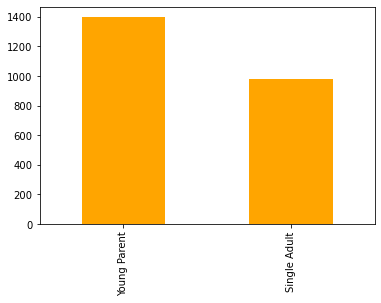

In [72]:
bar = df_CUST_ORD_PROD['Customer_Profile'].value_counts().plot.bar(color = 'orange')

# Plotting a bar graph to represent the different groups in 'Customer Profile'

## Task 7 - Aggregation (Max, Min & Mean) based on 'Visit Frequency' and 'Prices'

In [74]:
df_CUST_ORD_PROD.groupby('Customer_Profile').agg({'Visit_Frequency': ['mean', 'max', 'min']}) 

Visit_Frequency           
                            mean   max  min
Customer_Profile                           
Single Adult           10.875000  30.0  0.0
Young Parent            9.335938  30.0  0.0

In [76]:
df_CUST_ORD_PROD.groupby('Customer_Profile').agg({'prices': ['mean', 'max', 'min']})          

prices                     
                      mean        max       min
Customer_Profile                               
Single Adult      4.828125  14.296875  1.400391
Young Parent      1.514648   4.699219  1.299805

## Task 8 - Compare Customer Profile with 'Regions' and 'Departments'

In [156]:
df_DEPT=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

# Importing 'DEPARTMENT' dataset and assigning it to a dataframe 'df_DEPT'

In [99]:
crosstab_1 = pd.crosstab(df_CUST_ORD_PROD['Customer_Profile'], df_CUST_ORD_PROD['department_id'], dropna=False)

# To cross check 'Customer Profile' with 'department' in order to determine behaviours of customers
# Cross checked values are stored in the dataframe 'crosstab_1'

In [101]:
crosstab_1.to_clipboard()

# Copying the values in the dataframe 'crosstab_1' in order to paste in an Excel sheet

In [83]:
crosstab_2 = pd.crosstab(df_CUST_ORD_PROD['Customer_Profile'], df_CUST_ORD_PROD['Region'], dropna=False)

# To cross check 'Customer Profile' with 'department' in order to determine behaviours of customers
# Cross checked values are stored in the dataframe 'crosstab_2'

In [88]:
crosstab_2.to_clipboard()

# Copying the values in the dataframe 'crosstab_2' in order to paste in an Excel sheet

In [103]:
df_DEPT.to_clipboard()

# Copying the values in the dataframe 'df_DEPT' in order to paste in an Excel sheet

### Single Adults and Young Parents are more in Region 3.
### Single Adults and Young Parents are lesser in Region 1.

## Task 9 - Creating Viz. 

## CREATING COUNTPLOT GRAPH TO COMPARE CUST. PROFILE WITH REGION AND DEPARTMENTS

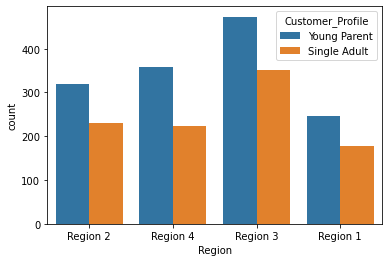

In [166]:
countplot_cust_region = sns.countplot(x = 'Region', hue = 'Customer_Profile', data = df_CUST_ORD_PROD)

# COUNTPLOT GRAPH TO COMPARE CUSTOMER PROFILES WITH REGIONS

### From a small sample, it can be seen that Region 3 has more Young Parents and Single Adults

In [167]:
countplot_cust_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'countplot_cust_region.png'))

# EXPORTING COUNTPLOT GRAPH TO LOCAL MACHINE

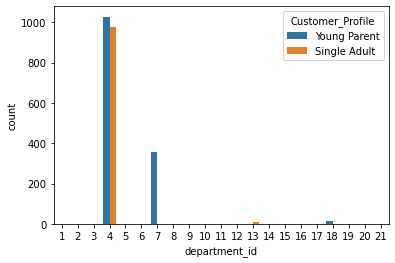

In [168]:
countplot_cust_dept = sns.countplot(x = 'department_id', hue = 'Customer_Profile', data = df_CUST_ORD_PROD)

# COUNTPLOT GRAPH TO COMPARE CUSTOMER PROFILES WITH DEPARTMENTS

### Department 4 stands for PRODUCE goods and it has the most items sold for a small sample of Young Parents and Single Adults

In [169]:
countplot_cust_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'countplot_cust_dept.png'))

# EXPORTING COUNTPLOT GRAPH TO LOCAL MACHINE

## CREATING A BAR GRAPH TO SHOW PRICE RANGE GROUPINGS FOR CUSTOMERS

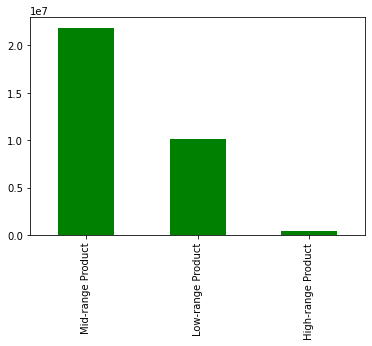

In [121]:
bar_price_range_loc = df_CUST_ORD_PROD['price_range_loc'].value_counts().plot.bar(color = 'green')

# CREATING A BAR GRAPH TO DISPLAY PRICE RANGE GROUPS 

In [124]:
df_CUST_ORD_PROD['price_range_loc'].value_counts()

# CHECKING COUNT FOR EACH PRODUCT RANGE

Mid-range Product     21860860
Low-range Product     10126321
High-range Product      417678
Name: price_range_loc, dtype: int64

In [122]:
bar_price_range_loc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range_loc.png'))

# EXPORTING THE BAR CHART TO LOCAL FOLDER

## CREATING A BAR GRAPH TO SHOW ORDERING HABITS BASED ON CUSTOMER REGION

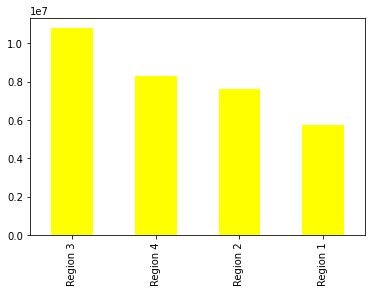

In [132]:
bar_customer_region = df_CUST_ORD_PROD['Region'].value_counts().plot.bar(color = 'yellow')

# CREATING BAR GRAPH TO SHOW HOW MANY ORDERS WERE MADE IN EACH REGION

In [134]:
df_CUST_ORD_PROD['Region'].value_counts()

Region 3    10791885
Region 4     8292913
Region 2     7597325
Region 1     5722736
Name: Region, dtype: int64

In [133]:
bar_customer_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_region.png'))

# EXPORTING THE BAR CHART TO LOCAL FOLDER

## CREATING GRAPHS TO SHOW CONNECTION BETWEEN AGE & FAMILY STATUS WITH RESPECT TO ORDERING HABITS

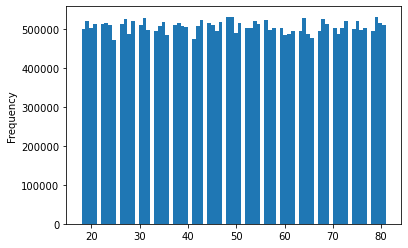

In [149]:
hist_price_range_loc = df_CUST_ORD_PROD['Age'].plot.hist(bins=80)

# CREATING A HISTOGRAM TO SHOW ORDERING HABITS BY AGE

In [151]:
hist_price_range_loc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_customers_age.png'))

# EXPORTING THE BAR CHART TO LOCAL FOLDER

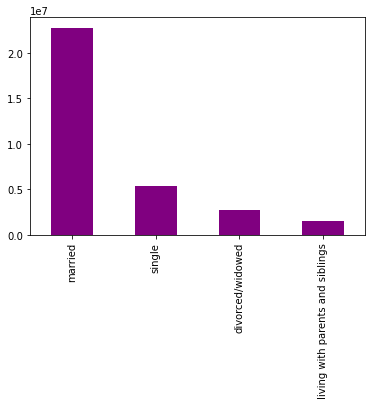

In [152]:
bar_fam_status = df_CUST_ORD_PROD['family_status'].value_counts().plot.bar(color = 'purple')

# CREATING A BAR CHART TO SHOW ORDERING HABITS BY FAMILY STATUS

In [153]:
bar_fam_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_status.png'))

# EXPORTING THE BAR CHART TO LOCAL FOLDER

## CREATING GRAPHS TO SHOW THE DEPARTMENTS WITH HIGHEST FREQUENCY OF ORDERS

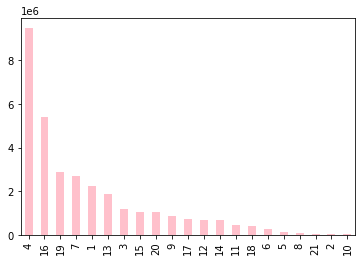

In [157]:
bar_orders_department = df_CUST_ORD_PROD['department_id'].value_counts().plot.bar(color = 'pink')

# CREATING A BAR CHART TO SHOW ORDERS MADE BY DEPARTMENT

In [158]:
df_CUST_ORD_PROD['department_id'].value_counts()

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

## Task 10 - Import file

In [112]:
# Exporting the CUSTOMER-ORDER-PRODUCT dataframe to local folder

df_CUST_ORD_PROD.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_new.pkl'))

In [170]:
df_CUST_ORD_PROD.shape

(32404859, 33)

In [114]:
df_DEPT.shape

(21, 2)

In [115]:
crosstab = pd.crosstab(df_CUST_ORD_PROD['days_since_prior_order'], df_CUST_ORD_PROD['order_number'], dropna = False)

# To cross check 'days_since_prior_order' with 'order_number' in order to determine when 1st order was placed

In [116]:
crosstab

# Prints data stored in 'crosstab' dataframe

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,2076096,20536,20441,17984,16438,16046,14384,13890,12774,11460,...,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,31674,29950,28010,27092,25533,24996,22921,21783,21067,...,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46454,46264,43902,40729,40907,38101,37519,35745,33830,...,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,61637,63388,59996,57882,56183,52869,49291,48295,47826,...,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,76733,78861,73540,70519,66569,62399,61143,59499,57700,...,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810
5.0,0,88999,91741,86503,81859,77583,73584,70020,64468,63154,...,1630,1630,1367,983,1215,1220,1166,966,912,936
6.0,0,120681,122871,114644,106764,100756,95954,89752,87203,78634,...,754,842,940,1014,835,570,490,602,485,542
7.0,0,184802,181656,167597,157442,143628,137675,128423,120734,114769,...,634,573,521,440,602,421,420,378,419,322
8.0,0,112324,110742,102217,94945,87611,81622,78760,71070,67567,...,238,262,228,244,275,232,234,143,137,84
